In [1]:
import pandas as pd 
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, KernelPCA
from matplotlib import pyplot
import seaborn as sns
import matplotlib.pyplot as plt 
from pandas_profiling import ProfileReport

In [2]:
df = pd.read_csv('../Source/prepocessed_data.csv', sep= ',')

In [6]:
prof = ProfileReport(df)
prof.to_file(output_file='Spotify_report.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 56.78it/s]


In [3]:
del df['acousticness']
del df['energy']

In [4]:
distortions = []
K = range(1,27)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

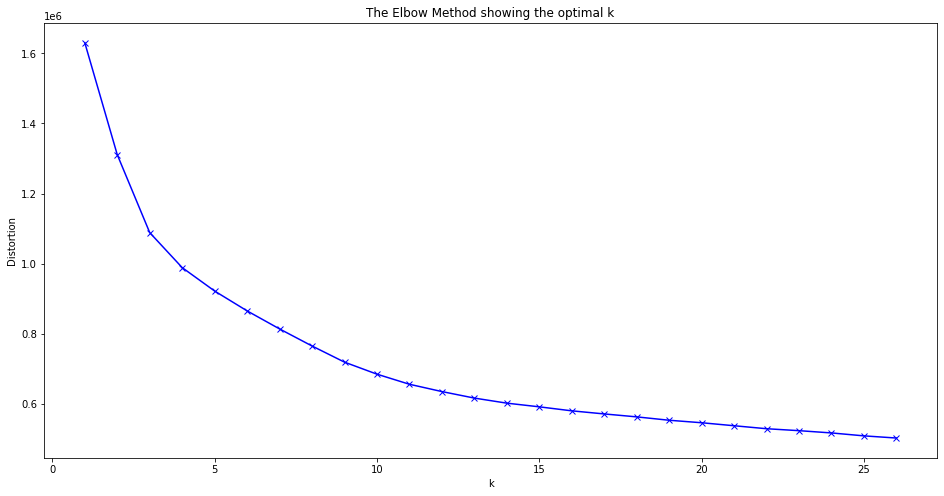

In [5]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

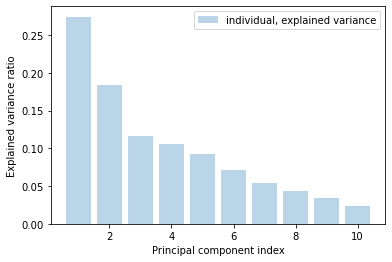

In [7]:
# Compute covariance matrix and eigenvalues (EVal) / eigenvectors (EVec)
np_df = df.to_numpy()

cov_mat = np.cov(np_df.T)
EVal, EVec = np.linalg.eig(cov_mat)


# Calculate (sum of) explained variances
sum_EVal = sum(EVal)
var_exp = [(i / sum_EVal) for i in sorted(EVal, reverse=True)]
scurr = range(1, 11)


# Plot explained variances
plt.bar(scurr, var_exp, alpha=0.3, align='center', label='individual, explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [25]:
#As we can see in the initial elbow plot there is no real elbow since the distance changes rather smoothly
# Additionally we have to say that 

pca = PCA(n_components=8)
df_pca = pca.fit_transform(df)

distortions = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_pca)
    distortions.append(kmeanModel.inertia_)

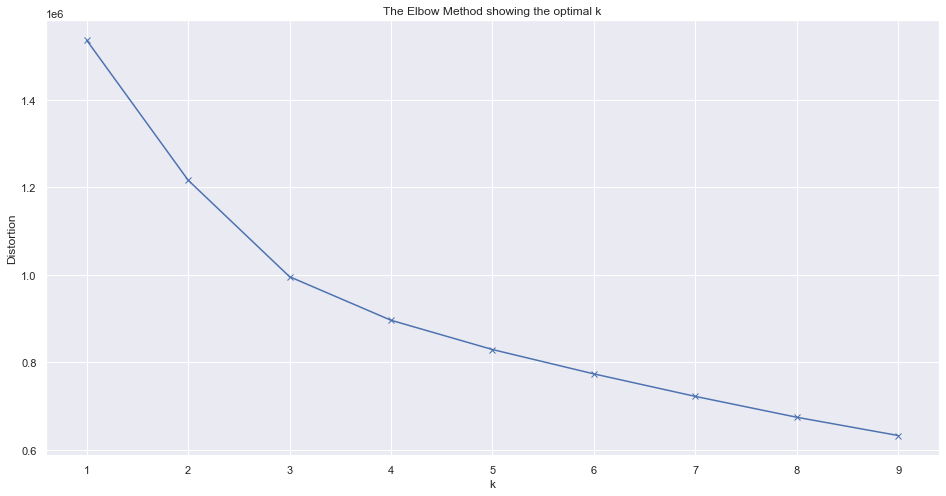

In [26]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [35]:
kmeans = KMeans(n_clusters=26, max_iter=10000)
X_dist = kmeans.fit_transform(df_pca) 
representative_idx = np.argmin(X_dist, axis=1)

In [36]:
#Man könnte jetzt noch analysieren
Spotify_df = pd.read_csv('../Source/auxiliary_data.csv', sep= ',')

In [37]:
Spotify_df['cluster'] = representative_idx

In [59]:
amount_genres = []
points_per_cluster = []

for k in range(0, 1):
    number_of_points = Spotify_df['genre'].loc[Spotify_df['cluster'] == k].nunique()
    unique_genres = Spotify_df['genre'].loc[Spotify_df['cluster'] == k].unique()

    amount_genres.append(len(unique_genres))
    points_per_cluster.append(number_of_points)

In [60]:
print(amount_genres)
#The next step would be to identify how often a certain genre is in a cluster

[23]


In [75]:
matrix_of_truth = pd.crosstab(Spotify_df['genre'], Spotify_df['cluster'])

In [74]:
matrix_of_truth

cluster,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
genre,,,,,,,,,,,,,,,,,,,,,
A Capella,19,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,6,1
Alternative,8,535,354,18,193,0,321,345,13,1517,...,1,460,1629,2,1,76,297,4,157,961
Anime,174,489,505,780,145,0,7,304,723,52,...,9,147,117,0,67,692,514,1,1498,251
Blues,74,614,789,28,669,4,6,266,54,120,...,47,438,132,0,25,281,1723,17,754,676
Children's Music,3028,92,135,46,81,29,25,26,73,253,...,4,88,295,10,1,671,135,213,309,139
Classical,47,304,14,950,94,5,0,209,930,15,...,261,25,54,2,1581,306,41,18,68,282
Comedy,102,15,42,0,129,6100,4,0,0,4,...,38,57,4,1923,0,0,46,940,45,15
Country,18,305,912,1,145,1,64,7,0,607,...,1,312,786,0,0,8,960,2,304,784
Dance,51,54,275,2,53,0,389,143,3,1997,...,0,414,1245,0,1,30,104,0,17,237


In [ ]:
#next step is to set a threshold to make numbers below a certian number to zero